<a href="https://colab.research.google.com/github/piyush1856/maths-for-machine-learning/blob/main/principle_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [54]:
faces = fetch_olivetti_faces()
type(faces)

sklearn.utils._bunch.Bunch

In [55]:
faces.__class__

sklearn.utils._bunch.Bunch

In [56]:
faces.__class__.__mro__

(sklearn.utils._bunch.Bunch, dict, object)

In [57]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [58]:
data = faces.data

In [59]:
data.shape

(400, 4096)

In [60]:
example_image = data[390]
example_image

array([0.54545456, 0.61157024, 0.6404959 , ..., 0.17355372, 0.17355372,
       0.18181819], dtype=float32)

In [61]:
example_image = example_image.reshape(64,64)

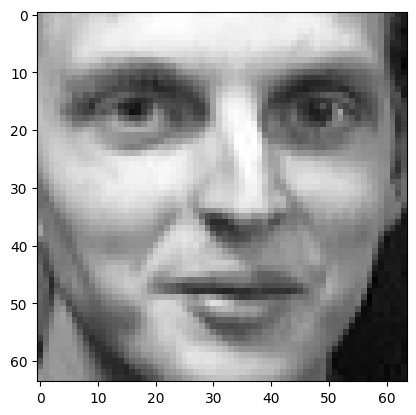

In [62]:
plt.imshow(example_image, cmap='binary_r')

- Each images here contains 4096 numbers
- Our goal is to see if lesser numbers(100 or 200) can represent the image ?

In [63]:
# d = 4096
# d' = 100; d' will be called n_components

In [64]:
n_components = 100 # d'
pca = PCA(n_components=n_components)

In [65]:
pca.fit(data) # pca works on 400 * 4096; each row is a scatterplot point
# 400 points in the scatterplot, each point being in 4096 dimension

PCA(n_components=100)

In [66]:
components = pca.transform(data)

In [67]:
components.shape
# component give me reduced dimension of the data (d')
# lost the extra information

(400, 100)

In [68]:
reconstructed = pca.inverse_transform(components)

In [69]:
reconstructed.shape

(400, 4096)

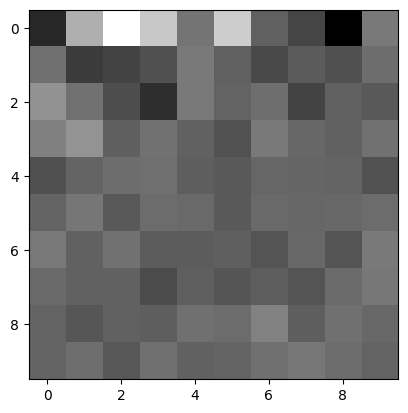

In [70]:
component_img = components[390]
component_img = component_img.reshape(10,10)
plt.imshow(component_img, cmap='binary_r')

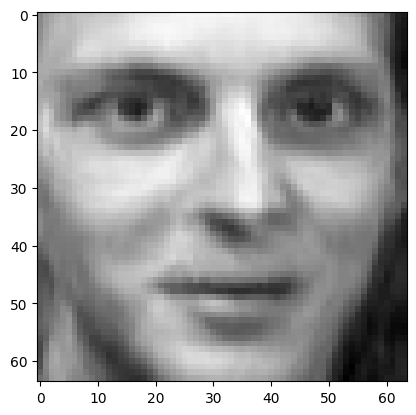

In [71]:
reconstructed_img = reconstructed[390]
reconstructed_img = reconstructed_img.reshape(64,64)
plt.imshow(reconstructed_img, cmap='binary_r')

Text(0, 0.5, '100-dim\nReconstructed')

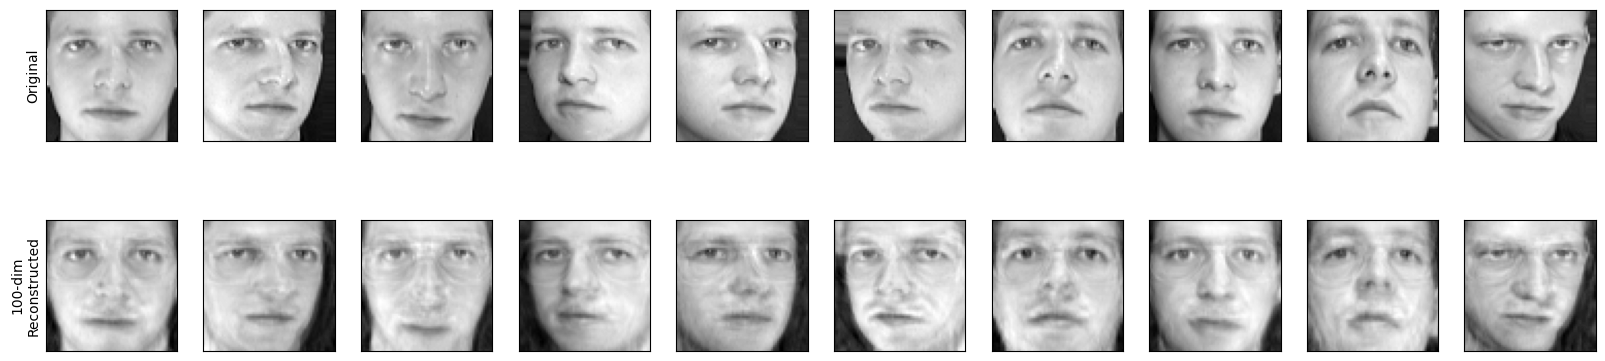

In [72]:
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(data)
components = pca.transform(data)
reconstructed = pca.inverse_transform(components)

fig, ax = plt.subplots(2,10, figsize=(20, 5), subplot_kw=dict(xticks=[], yticks=[]))

for i in range (10):
  ax[0,i].imshow(data[i].reshape(64,64), cmap='binary_r')
  ax[1,i].imshow(reconstructed[i].reshape(64,64), cmap='binary_r')

ax[0,0].set_ylabel('Original')
ax[1,0].set_ylabel(f'{n_components}-dim\nReconstructed')

# **Example 2**

In [73]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 1.67MB/s]


In [74]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


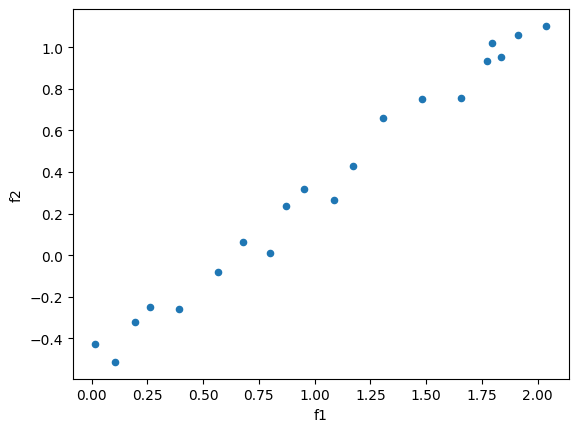

In [75]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()


[37.85422556  0.14577444]


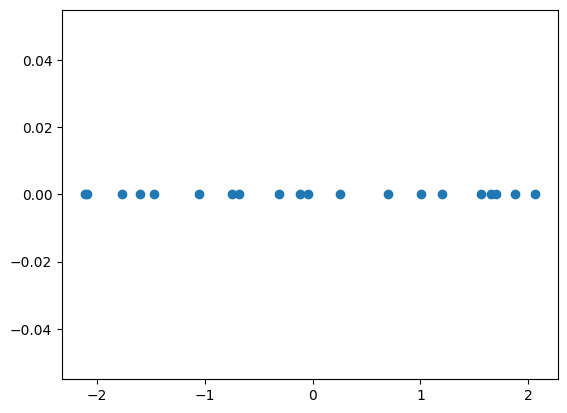

In [76]:
## Implement PCA!!
# Step 1: Column standardization

mu = data.mean(axis = 0)

std = data.std(axis = 0)

X_st = (data - mu)/std

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.values.T, X_st.values)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
max_idx = np.argmax(eigenvalues)
X_prime = eigenvectors[:, max_idx].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros(20))
plt.show()

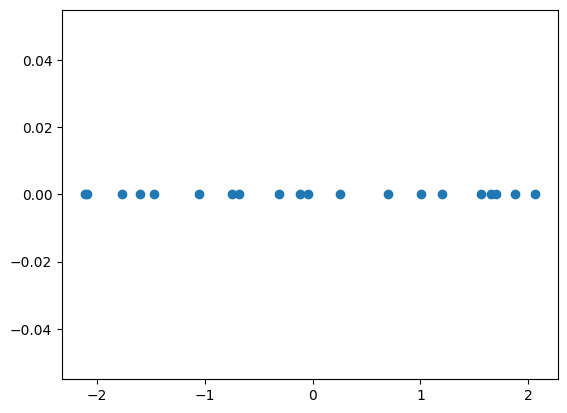

In [77]:
#PCA implementation using Sklearn library
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(X_st)

plt.figure()
plt.scatter(X_p[:, 0], np.zeros(20) )
plt.show()